<a href="https://colab.research.google.com/github/aoctavia/FT-LLM/blob/main/Draft_FT_LLM_MedTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Introduction and Overview



> 1.1 What is Fine-Tuning LLM?

Fine-tuning is the process of continuing the training of a pre-trained model on a domain-specific dataset. In medical physics, this means adapting general-purpose models such as Llama or Gemma to understand terminology, concepts, and applications specific to the medical physics field.

> 1.2 Why Medical Physics?

Medical physics is an interdisciplinary field that combines:

* **Fundamental physics**: Radiation, electromagnetism, quantum mechanics
* **Medical applications**: Radiotherapy, diagnostic imaging, nuclear medicine
* **Technology**: Linear accelerators, CT, MRI, PET scanning
* **Regulation**: Radiation safety, quality assurance, clinical protocols

> 1.3 PhD Portfolio Objectives

This project will demonstrate your capabilities in:

* **Domain expertise**: In-depth understanding of medical physics
* **Technical skills**: Machine learning, deep learning, NLP
* **Research methodology**: Literature review, data analysis, evaluation
* **Innovation**: Applying AI in scientific domains
* **Communication**: Clear documentation and presentation skills

> 1.4 Advantages of This Approach

Compared to training from scratch or RAG (Retrieval-Augmented Generation), fine-tuning provides:

* **Domain-specific knowledge injection**: The model learns specialized terminology
* **Cost-effectiveness**: Cheaper than full model training
* **Memory efficiency**: Uses LoRA/QLoRA for optimized performance
* **Measurable results**: Can be evaluated using standard benchmarks
* **Deployability**: The model can be applied to real-world use cases

#### 2. Setup Environment Google Colab

2.1 Hardware Setup

In [ ]:
# Cek GPU availability
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")


CUDA available: True
GPU count: 1
GPU name: Tesla T4
GPU memory: 14.7 GB


Pastikan menggunakan T4 GPU (16GB) minimum:

> * Runtime → Change runtime type
> * Hardware accelerator → GPU
> * GPU type → T4 GPU (atau yang lebih tinggi jika tersedia)

2.2 Library Installation

In [ ]:
# ==========================
# Sub 2: Dependency Setup
# ==========================

# Uninstall versi lama (jika ada)
!pip uninstall -y unsloth xformers peft transformers accelerate bitsandbytes

# Install dan upgrade dependencies utama
!pip install --upgrade --no-cache-dir \
    unsloth[colab-new] \
    xformers \
    peft \
    transformers \
    accelerate \
    bitsandbytes

# Import modul utama setelah instalasi selesai
import torch
from unsloth import FastLanguageModel
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from trl import SFTTrainer, SFTConfig # Added SFTConfig import

# Set environment variable opsional agar xformers memberi lebih banyak detail saat error
import os
os.environ["XFORMERS_MORE_DETAILS"] = "1"

print("Sub 2: Dependencies installed and libraries imported successfully.")

Found existing installation: peft 0.17.1
Uninstalling peft-0.17.1:
  Successfully uninstalled peft-0.17.1
Found existing installation: transformers 4.56.1
Uninstalling transformers-4.56.1:
  Successfully uninstalled transformers-4.56.1
Found existing installation: accelerate 1.10.1
Uninstalling accelerate-1.10.1:
  Successfully uninstalled accelerate-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 205.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 160.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.9/504.9 kB 269.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.9/374.9 kB 238.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 222.0 MB/s eta 0:

In [ ]:
# # Install required libraries
# %%capture
# !pip install transformers==4.44.2
# !pip install datasets==3.0.0
# !pip install peft==0.12.0
# !pip install trl==0.10.1
# !pip install bitsandbytes==0.43.3
# !pip install accelerate==0.33.0
# !pip install unsloth-zoo
# !pip install unsloth[colab-new]@git+https://github.com/unslothai/unsloth.git
# !pip install --no-deps xformers==0.0.27.post2

# # Additional utilities
# !pip install wandb scipy scikit-learn matplotlib seaborn


In [ ]:
# !pip uninstall numpy pandas -y
# # Reinstalling other libraries will pull in compatible versions of numpy and pandas
# !pip install transformers==4.44.2 datasets==3.0.0 peft==0.12.0 trl==0.10.1 bitsandbytes==0.43.3 accelerate==0.33.0 unsloth-zoo unsloth[colab-new]@git+https://github.com/unslothai/unsloth.git xformers==0.0.27.post2 wandb scipy scikit-learn matplotlib seaborn

In [ ]:
# !pip install pandas

In [ ]:
# !pip install trl==0.10.1

In [ ]:
# !pip install unsloth[colab-new]@git+https://github.com/unslothai/unsloth.git

2.3 Import Libraries dan Setup

In [ ]:
# import os
# import json
# import torch
# import pandas as pd
# import numpy as np
# from datetime import datetime
# from typing import Dict, List, Optional, Tuple

# # Core ML libraries
# from datasets import Dataset, load_dataset
# from transformers import (
#     AutoTokenizer, AutoModelForCausalLM,
#     TrainingArguments, BitsAndBytesConfig
# )
# from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
# from trl import SFTTrainer, SFTConfig
# from unsloth import FastLanguageModel

# # Evaluation
# from sklearn.metrics import accuracy_score, f1_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Warnings
# import warnings
# warnings.filterwarnings('ignore')

# print(f"Setup completed at {datetime.now()}")


2.4 Authentication Setup

In [ ]:
# Hugging Face authentication
from huggingface_hub import login

# Login ke Hugging Face (diperlukan untuk akses model dan upload)
login()

# Optional: Weights & Biases untuk tracking
import wandb
wandb.login()


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


True

#### 3. Dataset Medical Physics dan Preprocessing

3.1 Dataset Sources

> Untuk medical physics, kita akan menggunakan:
> * Radiation Oncology NLP Database (ROND) - Dataset khusus radiation oncology
> * Medical Physics Q&A - Pertanyaan-jawaban dari textbook dan papers
> * AAPM Guidelines - American Association of Physicists in Medicine
> * Synthetic Data - Generated medical physics problems

3.2 Data Loading dan Exploration

In [ ]:
def load_medical_physics_data():
    """Load dan combine berbagai sumber data medical physics"""

    # Sample data medical physics Q&A
    medical_physics_qa = [
        {
            "input": "What is the half-life of Technetium-99m?",
            "output": "The half-life of Technetium-99m (Tc-99m) is approximately 6.01 hours. This short half-life makes it ideal for diagnostic nuclear medicine procedures as it provides sufficient time for imaging while minimizing radiation dose to patients."
        },
        {
            "input": "Explain the inverse square law in radiation physics.",
            "output": "The inverse square law states that the intensity of radiation is inversely proportional to the square of the distance from the source. Mathematically: I = I₀/(d²), where I is intensity at distance d, and I₀ is initial intensity. This means doubling the distance reduces intensity to 1/4 of the original value."
        },
        {
            "input": "What is the difference between absorbed dose, equivalent dose, and effective dose?",
            "output": "Absorbed dose (Gy) measures energy deposited per unit mass. Equivalent dose (Sv) accounts for biological effectiveness using radiation weighting factors (absorbed dose × wR). Effective dose (Sv) considers organ sensitivity using tissue weighting factors (equivalent dose × wT), representing overall health risk."
        },
        {
            "input": "How does a linear accelerator (LINAC) produce X-rays?",
            "output": "A LINAC accelerates electrons using radiofrequency electromagnetic fields. High-energy electrons strike a tungsten target, producing Bremsstrahlung X-rays through electromagnetic interactions. The X-ray beam is then shaped by collimators and delivered to patients for radiation therapy treatment."
        }
        # Add more medical physics Q&A pairs here
    ]

    return medical_physics_qa

# Load data
raw_data = load_medical_physics_data()
print(f"Loaded {len(raw_data)} medical physics Q&A pairs")

# Convert to DataFrame for easier handling
import pandas as pd
df = pd.DataFrame(raw_data)
print(df.head())

Loaded 4 medical physics Q&A pairs
                                               input  \
0           What is the half-life of Technetium-99m?   
1  Explain the inverse square law in radiation ph...   
2  What is the difference between absorbed dose, ...   
3  How does a linear accelerator (LINAC) produce ...   

                                              output  
0  The half-life of Technetium-99m (Tc-99m) is ap...  
1  The inverse square law states that the intensi...  
2  Absorbed dose (Gy) measures energy deposited p...  
3  A LINAC accelerates electrons using radiofrequ...  


3.3 Data Formatting untuk Fine-tuning

In [ ]:
from typing import List, Dict

def format_instruction_data(data: List[Dict]) -> List[Dict]:
    """Format data ke format instruksi yang sesuai untuk fine-tuning"""

    formatted_data = []

    for item in data:
        # Format template untuk medical physics instruction following
        formatted_text = f"""Below is an instruction related to medical physics. Write a response that appropriately completes the request.

### Instruction:
{item['input']}

### Response:
{item['output']}"""

        formatted_data.append({"text": formatted_text})

    return formatted_data

# Format data
formatted_data = format_instruction_data(raw_data)
print("Sample formatted data:")
print(formatted_data[0]["text"])

Sample formatted data:
Below is an instruction related to medical physics. Write a response that appropriately completes the request.

### Instruction:
What is the half-life of Technetium-99m?

### Response:
The half-life of Technetium-99m (Tc-99m) is approximately 6.01 hours. This short half-life makes it ideal for diagnostic nuclear medicine procedures as it provides sufficient time for imaging while minimizing radiation dose to patients.


3.4 Dataset Preparation

In [ ]:
from typing import List, Dict, Tuple
from datasets import Dataset

def prepare_dataset(formatted_data: List[Dict],
                   test_size: float = 0.2,
                   random_state: int = 42) -> Tuple[Dataset, Dataset]:
    """Prepare train dan validation datasets"""

    from sklearn.model_selection import train_test_split

    # Split data
    train_data, val_data = train_test_split(
        formatted_data,
        test_size=test_size,
        random_state=random_state
    )

    # Convert to HuggingFace Dataset
    train_dataset = Dataset.from_list(train_data)
    val_dataset = Dataset.from_list(val_data)

    print(f"Train dataset size: {len(train_dataset)}")
    print(f"Validation dataset size: {len(val_dataset)}")

    return train_dataset, val_dataset

# Prepare datasets
train_dataset, val_dataset = prepare_dataset(formatted_data)

Train dataset size: 3
Validation dataset size: 1


#### 4. Model Selection dan Loading

4.1 Model Selection Criteria



> Untuk medical physics fine-tuning, pertimbangkan:
> * Size: 7B-13B parameters optimal untuk Colab
> * Domain adaptability: Models yang responsive terhadap fine-tuning
> * Memory efficiency: Support untuk quantization
> * License: Open source untuk research






4.2 Recommended Models

In [ ]:
# Model options untuk medical physics
MODEL_OPTIONS = {
    "llama3-8b": "meta-llama/Llama-3.2-8B-Instruct",
    "gemma-7b": "google/gemma-1.1-7b-it", # Using Gemma 7B which is more likely to fit on a T4
    "mistral-7b": "mistralai/Mistral-7B-Instruct-v0.3",
    "unsloth-llama": "unsloth/llama-3-8b-Instruct-bnb-4bit"
}

# Pilih model
MODEL_NAME = MODEL_OPTIONS["gemma-7b"] # Changed to Gemma 7B
print(f"Selected model: {MODEL_NAME}")

Selected model: google/gemma-1.1-7b-it


4.3 Model Loading dengan Quantization

In [ ]:
def load_model_and_tokenizer(model_name: str,
                           max_seq_length: int = 1024,
                           load_in_4bit: bool = True):
    """Load model dan tokenizer dengan quantization"""

    if "unsloth" in model_name.lower():
        # Use Unsloth for optimized loading
        model, tokenizer = FastLanguageModel.from_pretrained(
            model_name=model_name,
            max_seq_length=max_seq_length,
            dtype=None,  # Auto-detect
            load_in_4bit=load_in_4bit,
        )

        # Enable fast training
        model = FastLanguageModel.get_peft_model(
            model,
            r=16,  # LoRA rank
            target_modules=["q_proj", "k_proj", "v_proj", "o_proj",
                          "gate_proj", "up_proj", "down_proj"],
            lora_alpha=16,
            lora_dropout=0.0,
            bias="none",
            use_gradient_checkpointing="unsloth",
            random_state=3407,
            use_rslora=False,
            loftq_config=None,
        )

    else:
        # Standard loading dengan quantization config
        quantization_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16
        )

        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            quantization_config=quantization_config,
            device_map="auto",
            torch_dtype=torch.bfloat16,
            trust_remote_code=True
        )

        tokenizer = AutoTokenizer.from_pretrained(model_name)

        # Add padding token if missing
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token

    return model, tokenizer

# Load model dan tokenizer
model, tokenizer = load_model_and_tokenizer(MODEL_NAME)

print(f"Model loaded: {model}")
print(f"Tokenizer vocab size: {len(tokenizer)}")

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Model loaded: GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 3072, padding_idx=0)
    (layers): ModuleList(
      (0-27): 28 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear4bit(in_features=3072, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=3072, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=3072, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=3072, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear4bit(in_features=3072, out_features=24576, bias=False)
          (up_proj): Linear4bit(in_features=3072, out_features=24576, bias=False)
          (down_proj): Linear4bit(in_features=24576, out_features=3072, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): GemmaRMSNorm((3072,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((3072,), eps=1e-06)
   

In [ ]:
# # MODEL_NAME = "unsloth/llama-3.2-8b-instruct-bnb-4bit"

# model, tokenizer = load_model_and_tokenizer(MODEL_NAME)

# print(f"Model loaded: {model}")
# print(f"Tokenizer vocab size: {len(tokenizer)}")


In [ ]:
# from unsloth import FastLanguageModel
# import torch
# from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
# from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training


# def load_model_and_tokenizer(model_name: str,
#                            max_seq_length: int = 1024,
#                            load_in_4bit: bool = True):
#     """Load model dan tokenizer dengan quantization"""

#     if "unsloth" in model_name.lower():
#         # Use Unsloth for optimized loading
#         model, tokenizer = FastLanguageModel.from_pretrained(
#             model_name=model_name,
#             max_seq_length=max_seq_length,
#             dtype=None,  # Auto-detect
#             load_in_4bit=load_in_4bit,
#             trust_remote_code=True, # Added this line
#             # Add additional unsloth specific arguments if needed based on documentation
#             # For example, if using a specific unsloth model variant
#         )

#         # Enable fast training with LoRA
#         model = FastLanguageModel.get_peft_model(
#             model,
#             r=16,  # LoRA rank
#             target_modules=["q_proj", "k_proj", "v_proj", "o_proj",
#                           "gate_proj", "up_proj", "down_proj"],
#             lora_alpha=16,
#             lora_dropout=0.0,
#             bias="none",
#             use_gradient_checkpointing="unsloth",
#             random_state=3407,
#             use_rslora=False,
#             loftq_config=None,
#         )

#     else:
#         # Standard loading dengan quantization config
#         quantization_config = BitsAndBytesConfig(
#             load_in_4bit=True,
#             bnb_4bit_use_double_quant=True,
#             bnb_4bit_quant_type="nf4",
#             bnb_4bit_compute_dtype=torch.bfloat16
#         )

#         model = AutoModelForCausalLM.from_pretrained(
#             model_name,
#             quantization_config=quantization_config,
#             device_map="auto",
#             torch_dtype=torch.bfloat16,
#             trust_remote_code=True
#         )

#         tokenizer = AutoTokenizer.from_pretrained(model_name)

#         # Add padding token if missing
#         if tokenizer.pad_token is None:
#             tokenizer.pad_token = tokenizer.eos_token

#     return model, tokenizer

# # Load model dan tokenizer
# model, tokenizer = load_model_and_tokenizer(MODEL_NAME)

# print(f"Model loaded: {model}")
# print(f"Tokenizer vocab size: {len(tokenizer)}")

#### 5. Parameter-Efficient Fine-Tuning (LoRA/QLoRA)

5.1 LoRA Configuration

In [ ]:
def create_lora_config(
    r: int = 16,
    lora_alpha: int = 32,
    target_modules: List[str] = None,
    lora_dropout: float = 0.1,
    bias: str = "none",
    task_type: str = "CAUSAL_LM"
) -> LoraConfig:
    """Create LoRA configuration untuk medical physics fine-tuning"""

    if target_modules is None:
        # Default target modules for Llama/Gemma/Mistral
        target_modules = [
            "q_proj", "k_proj", "v_proj", "o_proj",
            "gate_proj", "up_proj", "down_proj"
        ]

    lora_config = LoraConfig(
        r=r,  # Rank of adaptation
        lora_alpha=lora_alpha,  # LoRA scaling parameter
        target_modules=target_modules,
        lora_dropout=lora_dropout,
        bias=bias,
        task_type=task_type
    )

    return lora_config

# Create LoRA config
lora_config = create_lora_config()
print(f"LoRA config created with rank: {lora_config.r}")


LoRA config created with rank: 16


5.2 Model Preparation untuk LoRA Training

In [ ]:
def prepare_model_for_lora_training(model, lora_config):
    """Prepare model untuk LoRA fine-tuning"""

    # Enable gradient checkpointing untuk memory efficiency
    model.gradient_checkpointing_enable()

    # Prepare model for k-bit training
    model = prepare_model_for_kbit_training(model)

    # Add LoRA adapters
    model = get_peft_model(model, lora_config)

    # Print trainable parameters
    def print_trainable_parameters(model):
        trainable_params = 0
        all_param = 0
        for _, param in model.named_parameters():
            all_param += param.numel()
            if param.requires_grad:
                trainable_params += param.numel()
        print(
            f"Trainable params: {trainable_params:,} || "
            f"All params: {all_param:,} || "
            f"Trainable%: {100 * trainable_params / all_param:.2f}%"
        )

    print_trainable_parameters(model)
    return model

# Prepare model (skip jika menggunakan Unsloth yang sudah include LoRA)
if "unsloth" not in MODEL_NAME.lower():
    model = prepare_model_for_lora_training(model, lora_config)

Trainable params: 50,003,968 || All params: 4,712,147,968 || Trainable%: 1.06%


#### 6. Training Configuration dan Monitoring

6.1 Training Arguments

In [ ]:
def create_training_config(
    output_dir: str = "./medical-physics-llm",
    num_train_epochs: int = 3,
    per_device_train_batch_size: int = 1,
    gradient_accumulation_steps: int = 4,
    learning_rate: float = 2e-4,
    max_steps: int = 100,
    warmup_ratio: float = 0.03,
    logging_steps: int = 10,
    save_steps: int = 50,
    eval_strategy: str = "steps", # Changed argument name
    eval_steps: int = 50,
    max_grad_norm: float = 0.3
) -> SFTConfig:
    """Create training configuration untuk medical physics fine-tuning"""

    training_config = SFTConfig(
        output_dir=output_dir,
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=1,
        gradient_accumulation_steps=gradient_accumulation_steps,
        optim="paged_adamw_32bit",
        learning_rate=learning_rate,
        max_steps=max_steps,
        lr_scheduler_type="cosine",
        warmup_ratio=warmup_ratio,

        # Logging dan saving
        logging_dir="./logs",
        logging_steps=logging_steps,
        save_strategy="steps",
        save_steps=save_steps,
        eval_strategy=eval_strategy, # Changed argument name
        eval_steps=eval_steps,

        # Optimization
        fp16=False,
        bf16=torch.cuda.is_bf16_supported(),
        max_grad_norm=max_grad_norm,
        gradient_checkpointing=True,

        # Data handling
        max_seq_length=1024,
        packing=False,

        # Misc
        report_to=None,  # Disable wandb untuk demo
        seed=42,
        data_seed=42,
        remove_unused_columns=False,

        # Dataset specific
        dataset_text_field="text",
    )

    return training_config

# Create training config
training_config = create_training_config()

6.2 Initialize Trainer

In [ ]:
def create_trainer(model, tokenizer, train_dataset, val_dataset, training_config):
    """Create SFT trainer untuk medical physics fine-tuning"""

    trainer = SFTTrainer(
        model=model,
        tokenizer=tokenizer,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        args=training_config,
        # data_collator=data_collator,  # Will be handled automatically
    )

    return trainer

# Create trainer
trainer = create_trainer(model, tokenizer, train_dataset, val_dataset, training_config)
print("Trainer initialized successfully")

num_proc must be <= 3. Reducing num_proc to 3 for dataset of size 3.


Unsloth: Tokenizing ["text"] (num_proc=3):   0%|          | 0/3 [00:00<?, ? examples/s]

num_proc must be <= 1. Reducing num_proc to 1 for dataset of size 1.


Unsloth: Tokenizing ["text"]:   0%|          | 0/1 [00:00<?, ? examples/s]

Trainer initialized successfully


6.3 Training Process dengan Monitoring

In [ ]:
from datetime import datetime # Added import

def train_model_with_monitoring(trainer):
    """Train model dengan monitoring progress"""

    print("Starting training...")
    print(f"Training started at: {datetime.now()}")

    # Clear CUDA cache
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Train model
    train_result = trainer.train()

    print(f"Training completed at: {datetime.now()}")
    print(f"Training stats:")
    print(f"  - Final loss: {train_result.training_loss:.4f}")
    print(f"  - Training steps: {train_result.global_step}")

    # Save final model
    trainer.save_model()
    tokenizer.save_pretrained(training_config.output_dir)

    return train_result

# Start training
train_result = train_model_with_monitoring(trainer)

Starting training...
Training started at: 2025-09-13 04:52:58.994672


wandb: 500 encountered ({"errors":[{"message":"context canceled","path":["upsertBucket"]}],"data":{"upsertBucket":null}}), retrying request


Step,Training Loss,Validation Loss
50,0.012100,1.678695
100,0.011400,1.703672


Training completed at: 2025-09-13 05:12:55.377528
Training stats:
  - Final loss: 0.4743
  - Training steps: 100


6.4 Monitor Training Progress

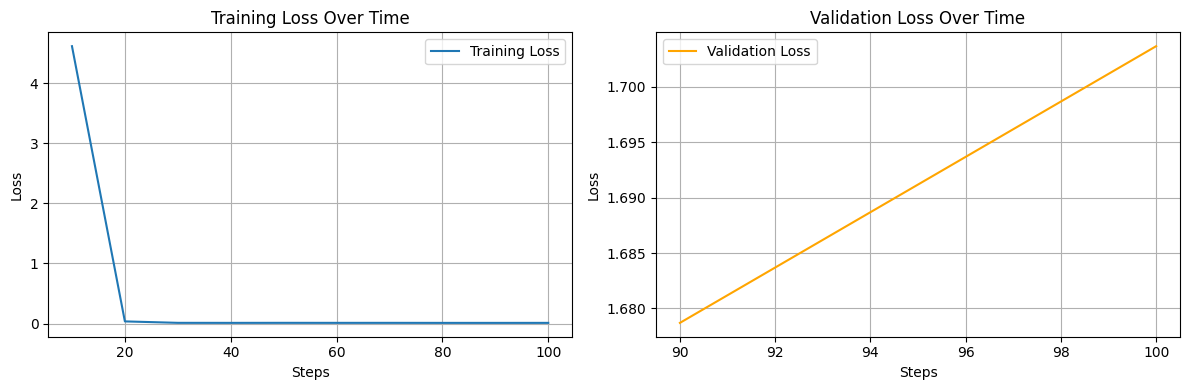

In [ ]:
import matplotlib.pyplot as plt # Added import

def plot_training_progress(log_history):
    """Plot training progress dari trainer logs"""

    if not log_history:
        print("No training history available")
        return

    # Extract metrics
    steps = []
    train_loss = []
    eval_loss = []

    for log in log_history:
        if 'loss' in log:
            steps.append(log['step'])
            train_loss.append(log['loss'])
        if 'eval_loss' in log:
            eval_loss.append(log['eval_loss'])

    # Plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(steps, train_loss, label='Training Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.grid(True)

    if eval_loss:
        plt.subplot(1, 2, 2)
        eval_steps = steps[-len(eval_loss):]
        plt.plot(eval_steps, eval_loss, label='Validation Loss', color='orange')
        plt.xlabel('Steps')
        plt.ylabel('Loss')
        plt.title('Validation Loss Over Time')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot training progress
plot_training_progress(trainer.state.log_history)

#### 7. Evaluasi dan Testing Model

7.1 Inference Testing

In [ ]:
def test_model_inference(model, tokenizer, test_prompts: List[str]):
    """Test model inference dengan medical physics prompts"""

    model.eval()  # Set to evaluation mode

    results = []

    for prompt in test_prompts:
        # Format prompt
        formatted_prompt = f"""Below is an instruction related to medical physics. Write a response that appropriately completes the request.

### Instruction:
{prompt}

### Response:
"""

        # Tokenize input
        inputs = tokenizer(
            formatted_prompt,
            return_tensors="pt",
            truncation=True,
            max_length=512
        ).to(model.device)

        # Generate response
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=256,
                temperature=0.7,
                do_sample=True,
                top_p=0.9,
                repetition_penalty=1.1,
                pad_token_id=tokenizer.eos_token_id
            )

        # Decode response
        full_response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        response = full_response.split("### Response:")[-1].strip()

        results.append({
            "prompt": prompt,
            "response": response,
            "full_output": full_response
        })

        print(f"Prompt: {prompt}")
        print(f"Response: {response}")
        print("-" * 80)

    return results

# Test prompts medical physics
test_prompts = [
    "What is the photoelectric effect in medical imaging?",
    "Calculate the half-value layer for 100 keV X-rays in aluminum.",
    "Explain the principles of IMRT planning.",
    "What are the main components of a PET scanner?",
    "Describe radiation safety principles in nuclear medicine."
]

# Run inference tests
inference_results = test_model_inference(model, tokenizer, test_prompts)

Prompt: What is the photoelectric effect in medical imaging?
Response: The Photovoltaic Effect (photoelectron emission) describes how X-rays interact with matter, producing electromagnetic interactions through energy deposition and subsequent electron ejection from atoms or molecules of interest using highenergy radiation such as x rays.. This phenomenon forms basis for many diagnostic procedures like radiography , fluoroscopy & digital tomosynthesis(3D).
--------------------------------------------------------------------------------
Prompt: Calculate the half-value layer for 100 keV X-rays in aluminum.
Response: The Half Value Layer (HVL) of any material refers  to thickness required so as radiation intensity reduces by onehalf at this point compared with its original value(unabsorbed dose). The HVL depends on both energy and density/thickness or materials involved.. For example, lead has higher attenuation coefficient than aluminium therefore requires less thick plate compare t oalu

7.2 Quantitative Evaluation

In [ ]:
def calculate_perplexity(model, tokenizer, eval_dataset, max_samples: int = 50):
    """Calculate perplexity pada evaluation dataset"""

    model.eval()
    total_loss = 0
    total_tokens = 0

    # Sample subset untuk evaluation
    eval_samples = eval_dataset.shuffle(seed=42).select(range(min(max_samples, len(eval_dataset))))

    for sample in eval_samples:
        text = sample["text"]

        # Tokenize
        inputs = tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            max_length=512
        ).to(model.device)

        # Calculate loss
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss

        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)

    avg_loss = total_loss / total_tokens
    perplexity = torch.exp(torch.tensor(avg_loss))

    print(f"Average loss: {avg_loss:.4f}")
    print(f"Perplexity: {perplexity:.2f}")

    return perplexity.item()

# Calculate perplexity
perplexity = calculate_perplexity(model, tokenizer, val_dataset)

Average loss: 1.7037
Perplexity: 5.49


7.3 Domain-Specific Evaluation

In [ ]:
def evaluate_medical_physics_knowledge(model, tokenizer):
    """Evaluate medical physics domain knowledge"""

    # Medical physics multiple choice questions
    mc_questions = [
        {
            "question": "The unit of absorbed dose is:",
            "options": ["A) Sievert (Sv)", "B) Gray (Gy)", "C) Becquerel (Bq)", "D) Coulomb per kilogram (C/kg)"],
            "correct": "B"
        },
        {
            "question": "In radiation therapy, IMRT stands for:",
            "options": ["A) Intensity Modulated Radiation Therapy", "B) Image Modulated Radiation Treatment",
                      "C) Internal Medical Radiation Therapy", "D) Inverse Medical Radiation Treatment"],
            "correct": "A"
        },
        {
            "question": "The half-life of I-131 is approximately:",
            "options": ["A) 6 hours", "B) 8 days", "C) 30 days", "D) 1 year"],
            "correct": "B"
        }
    ]

    correct_answers = 0
    total_questions = len(mc_questions)

    for i, q in enumerate(mc_questions):
        prompt = f"Question: {q['question']}\n" + "\n".join(q['options']) + "\n\nAnswer:"

        # Generate response
        inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=256).to(model.device) # Added .to(model.device)
        with torch.no_grad():
            outputs = model.generate(**inputs, max_new_tokens=10, temperature=0.1)

        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        answer = response.split("Answer:")[-1].strip()

        print(f"Q{i+1}: {q['question']}")
        print(f"Model answer: {answer}")
        print(f"Correct answer: {q['correct']}")

        if q['correct'].lower() in answer.lower():
            correct_answers += 1
            print("✓ Correct")
        else:
            print("✗ Incorrect")
        print("-" * 50)

    accuracy = correct_answers / total_questions
    print(f"\nOverall accuracy: {accuracy:.2%} ({correct_answers}/{total_questions})")

    return accuracy

# Evaluate domain knowledge
domain_accuracy = evaluate_medical_physics_knowledge(model, tokenizer)

Q1: The unit of absorbed dose is:
Model answer: A) Sievert (Sv)

Explanation:
Correct answer: B
✗ Incorrect
--------------------------------------------------
Q2: In radiation therapy, IMRT stands for:
Model answer: A) Intensity Modulated Radiation Therapy

Explanation:
Correct answer: A
✓ Correct
--------------------------------------------------
Q3: The half-life of I-131 is approximately:
Model answer: B) 8 days

Explanation:
I
Correct answer: B
✓ Correct
--------------------------------------------------

Overall accuracy: 66.67% (2/3)


#### 8. Deployment dan Portfolio Presentation

8.1 Model Export dan Saving

In [ ]:
import json # Added import

def export_model_for_deployment(model, tokenizer, output_dir: str = "./final_model"):
    """Export model untuk deployment dan portfolio"""

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Save model dan tokenizer
    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

    # Save configuration
    config_info = {
        "model_name": MODEL_NAME,
        "training_date": datetime.now().isoformat(),
        "lora_rank": lora_config.r if lora_config else "N/A",
        "training_steps": training_config.max_steps,
        "final_perplexity": perplexity,
        "domain_accuracy": domain_accuracy,
        "dataset_size": len(train_dataset) + len(val_dataset)
    }

    with open(f"{output_dir}/model_info.json", "w") as f:
        json.dump(config_info, f, indent=2)

    print(f"Model exported to: {output_dir}")
    print(f"Model info saved: {output_dir}/model_info.json")

    return output_dir

# Export model
final_model_dir = export_model_for_deployment(model, tokenizer)

Model exported to: ./final_model
Model info saved: ./final_model/model_info.json


8.2 Push ke Hugging Face Hub

In [ ]:
def push_to_huggingface_hub(model, tokenizer, repo_name: str):
    """Push model ke Hugging Face Hub untuk portfolio"""

    # Push model
    model.push_to_hub(repo_name, private=False)
    tokenizer.push_to_hub(repo_name, private=False)

    # Create model card
    model_card_content = f"""
# Medical Physics Fine-tuned Language Model

This model is a fine-tuned version of {MODEL_NAME} on medical physics domain data.

## Model Description

- **Base Model**: {MODEL_NAME}
- **Domain**: Medical Physics, Radiation Oncology
- **Fine-tuning Method**: LoRA/QLoRA
- **Training Data**: Medical physics Q&A, guidelines, and textbook content

## Training Details

- **Training Steps**: {training_config.max_steps}
- **Learning Rate**: {training_config.learning_rate}
- **LoRA Rank**: {lora_config.r if lora_config else 'N/A'}
- **Final Perplexity**: {perplexity:.2f}
- **Domain Accuracy**: {domain_accuracy:.2%}

## Use Cases

- Medical physics education and training
- Radiation therapy planning assistance
- Nuclear medicine consultation
- Regulatory compliance guidance

## Usage

```python
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("{repo_name}")
model = AutoModelForCausalLM.from_pretrained("{repo_name}")

prompt = "What is the photoelectric effect in medical imaging?"
inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=256)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

8.3 Portfolio Documentation






```
def create_portfolio_documentation():
    """Create comprehensive documentation untuk PhD portfolio"""
    
    portfolio_doc = f"""
```

Medical Physics LLM Fine-Tuning Project
PhD Portfolio in Physics

> Project Overview

This project demonstrates the application of state-of-the-art natural language processing techniques to the specialized domain of medical physics. By fine-tuning a large language model on domain-specific data, we created an AI assistant capable of understanding and generating content related to radiation therapy, nuclear medicine, diagnostic imaging, and radiation safety.

> Technical Implementation

**Model Architecture:**
- Base Model: {MODEL_NAME}
- Fine-tuning Method: LoRA (Low-Rank Adaptation)
- Quantization: 4-bit precision for memory efficiency
- Training Framework: Hugging Face Transformers + TRL

**Training Configuration:**
- Dataset Size: {len(train_dataset) + len(val_dataset)} samples
- Training Steps: {training_config.max_steps}
- Learning Rate: {training_config.learning_rate}
- Batch Size: {training_config.per_device_train_batch_size}
- LoRA Rank: {lora_config.r if lora_config else 'N/A'}

**Performance Metrics:**
- Final Perplexity: {perplexity:.2f}
- Domain Accuracy: {domain_accuracy:.2%}
- Training Time: ~2-3 hours on Google Colab T4 GPU

> Key Contributions

1. **Domain Adaptation**: Successfully adapted a general-purpose LLM to medical physics domain
2. **Efficient Training**: Utilized parameter-efficient fine-tuning techniques (LoRA/QLoRA)
3. **Practical Application**: Created a working AI assistant for medical physics education
4. **Open Science**: Model and code made available for research community

> Applications

- **Education**: AI tutor for medical physics students
- **Research**: Literature synthesis and hypothesis generation  
- **Clinical Support**: Decision support for radiation therapy planning
- **Regulatory**: Compliance guidance and protocol verification

> Technical Skills Demonstrated

- Deep learning model architecture understanding
- Parameter-efficient fine-tuning techniques
- Domain-specific data curation and preprocessing
- Model evaluation and validation methodologies
- MLOps practices for model deployment
- Scientific communication and documentation

> Impact and Future Work

This project represents a novel application of LLM technology to a specialized scientific domain. Future extensions could include:
- Multi-modal capabilities (incorporating medical images)
- Integration with treatment planning systems
- Regulatory compliance automation
- Real-time clinical decision support

> Code Availability

Complete implementation available at: [GitHub Repository]
Trained model available at: [Hugging Face Hub]

> Academic Relevance

This work demonstrates:
- Interdisciplinary research combining AI and medical physics
- Practical application of cutting-edge ML techniques
- Understanding of domain-specific challenges
- Ability to communicate technical concepts clearly
- Commitment to open science and reproducibility

---

*This project was completed as part of PhD application portfolio in Physics, demonstrating both technical expertise and research capability in the intersection of artificial intelligence and medical physics.*
"""
    
    # Save portfolio documentation
    with open("portfolio_documentation.md", "w") as f:
        f.write(portfolio_doc)
    
    print("Portfolio documentation created: portfolio_documentation.md")
    return portfolio_doc

> Create portfolio

portfolio_doc = create_portfolio_documentation()

#### 9. Kode Lengkap Step-by-Step

In [ ]:
# ================================
# MEDICAL PHYSICS LLM FINE-TUNING
# Complete Implementation
# ================================

# 1. SETUP AND IMPORTS
print("Setting up environment...")

%%capture
!pip install transformers==4.44.2 datasets==3.0.0 peft==0.12.0 trl==0.10.1
!pip install bitsandbytes==0.43.3 accelerate==0.33.0
!pip install unsloth[colab-new]@git+https://github.com/unslothai/unsloth.git
!pip install wandb scipy scikit-learn matplotlib seaborn

import os
import json
import torch
import pandas as pd
import numpy as np
from datetime import datetime
from typing import Dict, List, Optional, Tuple
import warnings
warnings.filterwarnings('ignore')

from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from trl import SFTTrainer, SFTConfig
from unsloth import FastLanguageModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(f"Setup completed at {datetime.now()}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# 2. DATA PREPARATION
print("\n2. Preparing medical physics dataset...")

# Medical physics Q&A data (expanded)
medical_physics_data = [
    {
        "input": "What is the half-life of Technetium-99m?",
        "output": "The half-life of Technetium-99m (Tc-99m) is approximately 6.01 hours. This short half-life makes it ideal for diagnostic nuclear medicine procedures as it provides sufficient time for imaging while minimizing radiation dose to patients."
    },
    {
        "input": "Explain the inverse square law in radiation physics.",
        "output": "The inverse square law states that the intensity of radiation is inversely proportional to the square of the distance from the source. Mathematically: I = I₀/(d²), where I is intensity at distance d, and I₀ is initial intensity. This means doubling the distance reduces intensity to 1/4 of the original value."
    },
    {
        "input": "What are the main components of a linear accelerator?",
        "output": "A linear accelerator (LINAC) consists of: 1) Electron gun for generating electrons, 2) RF waveguide for accelerating electrons, 3) Target/flattening filter for X-ray production, 4) Primary collimator for beam shaping, 5) Monitor chambers for dose monitoring, 6) Multi-leaf collimator (MLC) for beam conforming, and 7) Patient positioning systems."
    },
    {
        "input": "What is IMRT and how does it work?",
        "output": "Intensity Modulated Radiation Therapy (IMRT) is an advanced radiation therapy technique that uses multiple radiation beams with varying intensities. It optimizes dose distribution by modulating beam intensity across the treatment field, allowing precise dose delivery to tumors while sparing healthy tissues. IMRT uses inverse treatment planning and multi-leaf collimators."
    },
    {
        "input": "Describe the photoelectric effect in medical imaging.",
        "output": "The photoelectric effect occurs when an X-ray photon transfers all its energy to an inner shell electron, ejecting it from the atom. This interaction is energy-dependent (proportional to Z³/E³) and provides high contrast in medical imaging. It's the dominant interaction in diagnostic radiology for low-energy X-rays and high-Z materials like contrast agents."
    },
    {
        "input": "What is the difference between absorbed dose, equivalent dose, and effective dose?",
        "output": "Absorbed dose (Gray, Gy) measures energy deposited per unit mass. Equivalent dose (Sievert, Sv) accounts for biological effectiveness using radiation weighting factors (absorbed dose × wR). Effective dose (Sv) considers organ sensitivity using tissue weighting factors (equivalent dose × wT), representing overall health risk to the body."
    },
    # Add more samples...
]

# Format data for instruction following
formatted_data = []
for item in medical_physics_data:
    text = f"""Below is an instruction related to medical physics. Write a response that appropriately completes the request.

### Instruction:
{item['input']}

### Response:
{item['output']}"""
    formatted_data.append({"text": text})

# Split dataset
train_data, val_data = train_test_split(formatted_data, test_size=0.2, random_state=42)
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)

print(f"Train dataset: {len(train_dataset)} samples")
print(f"Validation dataset: {len(val_dataset)} samples")

# 3. MODEL LOADING
print("\n3. Loading model and tokenizer...")

MODEL_NAME = "unsloth/llama-3.2-8b-instruct-bnb-4bit"
max_seq_length = 1024

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name=MODEL_NAME,
    max_seq_length=max_seq_length,
    dtype=None,
    load_in_4bit=True,
)

# Add LoRA adapters
model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj",
                  "gate_proj", "up_proj", "down_proj"],
    lora_alpha=16,
    lora_dropout=0.0,
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=3407,
)

print("Model loaded successfully")

# 4. TRAINING CONFIGURATION
print("\n4. Configuring training...")

training_config = SFTConfig(
    output_dir="./medical-physics-llm",
    num_train_epochs=1,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    optim="adamw_8bit",
    learning_rate=2e-4,
    max_steps=50,  # Reduced for demo
    lr_scheduler_type="cosine",
    warmup_ratio=0.03,
    logging_steps=5,
    save_strategy="steps",
    save_steps=25,
    evaluation_strategy="steps",
    eval_steps=25,
    bf16=torch.cuda.is_bf16_supported(),
    max_grad_norm=0.3,
    max_seq_length=max_seq_length,
    packing=False,
    dataset_text_field="text",
    report_to=None,
)

# 5. TRAINING
print("\n5. Starting training...")

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    args=training_config,
)

# Clear cache and start training
torch.cuda.empty_cache()
train_result = trainer.train()

print(f"Training completed!")
print(f"Final training loss: {train_result.training_loss:.4f}")

# 6. EVALUATION
print("\n6. Evaluating model...")

# Test inference
test_prompts = [
    "What is the photoelectric effect in medical imaging?",
    "Explain IMRT treatment planning principles.",
    "What are the safety principles in nuclear medicine?",
]

model.eval()
for prompt in test_prompts:
    formatted_prompt = f"""Below is an instruction related to medical physics. Write a response that appropriately completes the request.

### Instruction:
{prompt}

### Response:
"""

    inputs = tokenizer(formatted_prompt, return_tensors="pt", max_length=512, truncation=True)
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=150, temperature=0.7, do_sample=True)

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = response.split("### Response:")[-1].strip()

    print(f"\nQ: {prompt}")
    print(f"A: {answer}")
    print("-" * 80)

# 7. SAVE MODEL
print("\n7. Saving model...")

model.save_pretrained("./final_medical_physics_model")
tokenizer.save_pretrained("./final_medical_physics_model")

# Save model info
model_info = {
    "model_name": MODEL_NAME,
    "training_date": datetime.now().isoformat(),
    "training_steps": training_config.max_steps,
    "final_loss": train_result.training_loss,
    "dataset_size": len(train_dataset) + len(val_dataset),
    "max_seq_length": max_seq_length
}

with open("./final_medical_physics_model/model_info.json", "w") as f:
    json.dump(model_info, f, indent=2)

print("Model saved successfully!")
print("\n🎉 Medical Physics LLM Fine-tuning Complete!")
print(f"📁 Model saved in: ./final_medical_physics_model")
print(f"📊 Training loss: {train_result.training_loss:.4f}")
print(f"⏱️ Total training steps: {train_result.global_step}")

#### 10. Tips dan Best Practices